In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/leasaab/Documents/Dev/AX3-Project/data/FemmeCardio.csv"

data = pd.read_csv(file_path)

timestamp_column = data.columns[0]
signal_columns = data.columns[1:]   # All remaining columns are sensor data

# Calculate the sampling interval (in seconds)
sampling_interval = (pd.to_datetime(data[timestamp_column].iloc[1]) -
                     pd.to_datetime(data[timestamp_column].iloc[0])).total_seconds()

# Create a relative time axis (in minutes)
data['relative_time_minutes'] = data.index * sampling_interval

# [COM] Utilisation Pratique

Reste à faire:

2.	Analyse des intensités :
	•	Les amplitudes réduites indiquent une faible intensité, tandis que les amplitudes plus élevées reflètent un effort plus important.
	•	Vous pourriez segmenter le signal en zones d’intensité faible, moyenne et élevée pour une meilleure compréhension de l’effort.

3.	Visualisation des phases d’activité :
	•	Vous pourriez isoler les périodes d’activité modérée et intense pour les comparer.

## Questions to Analyze:

Are there periods of increasing or decreasing intensity over time (e.g., warm-up, peak, cool-down)?
Is there a regular pattern, or are there fluctuations in signal amplitude that might indicate variations in your cardio activity (e.g., running, walking, or rest)?

Matrice de corrélation entre les axes :
           -0.296875  0.703125  -0.343750
-0.296875   1.000000  0.381799  -0.544951
0.703125    0.381799  1.000000  -0.024659
-0.343750  -0.544951 -0.024659   1.000000


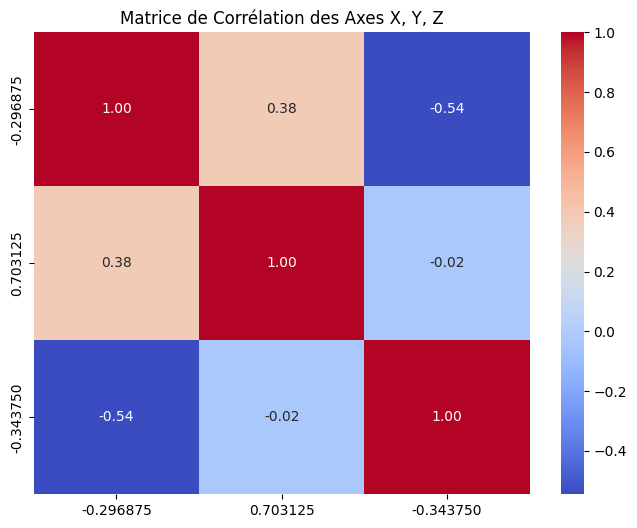

In [20]:
# Filtrer uniquement les colonnes des signaux (X, Y, Z)
signal_columns = ['-0.296875', '0.703125', '-0.343750']  # Ajustez selon les noms exacts des colonnes

# Calculer la matrice de corrélation entre les axes
correlation_matrix = filtered_data_df[signal_columns].corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation entre les axes :")
print(correlation_matrix)

# Visualiser la matrice de corrélation sous forme de heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matrice de Corrélation des Axes X, Y, Z")
plt.show()

# 3. Intensity Analysis

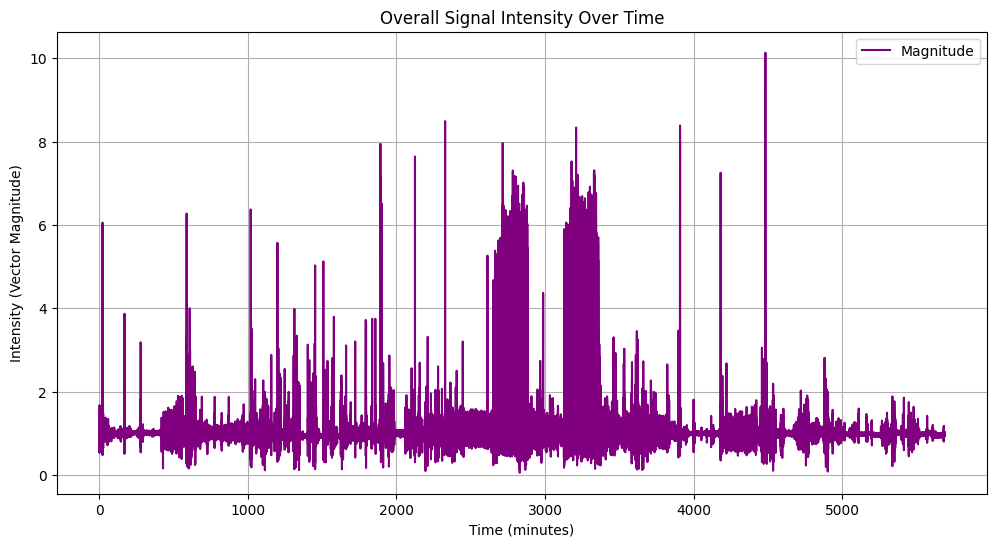

In [5]:
import numpy as np

# Compute the vector magnitude for overall intensity
data['magnitude'] = np.sqrt(
    sum(data[signal]**2 for signal in signal_columns)
)

# Plot the magnitude
plt.figure(figsize=(12, 6))
plt.plot(data['relative_time_minutes'], data['magnitude'], label="Magnitude", color='purple')

plt.title("Overall Signal Intensity Over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Intensity (Vector Magnitude)")
plt.legend()
plt.grid(True)
plt.show()

	A single line representing the overall signal intensity (a combination of all axes). Peaks in magnitude indicate periods of higher activity intensity.

Heatmap of Intensities Per Axis

Heatmaps are excellent for showing how intensity changes for each axis over time

/var/folders/qx/1f46qx2d38zfm39064m17wxm0000gn/T/ipykernel_28713/3936689165.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for level, group in data.groupby('intensity_level'):


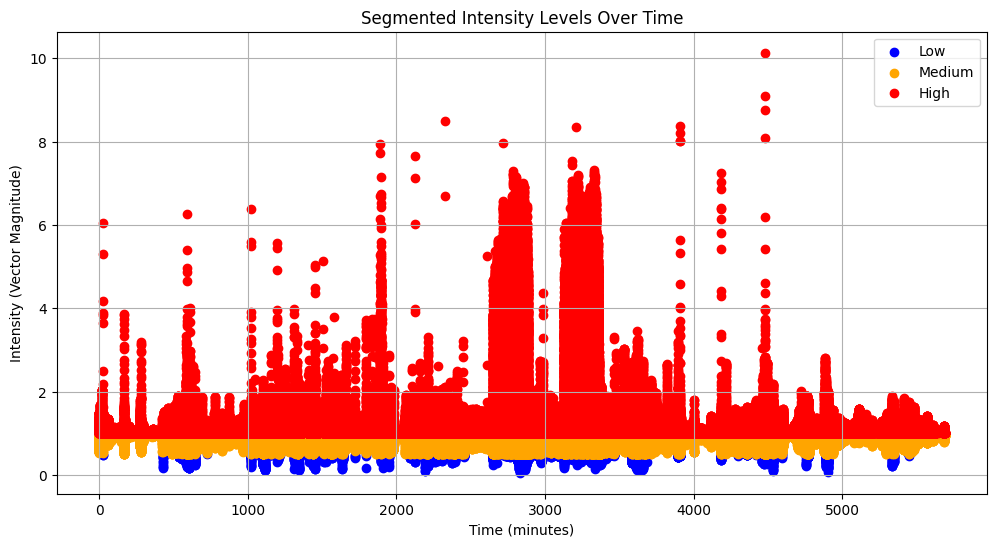

In [6]:
# Define thresholds for intensity levels
low_threshold = 0.5
high_threshold = 1.0

# Classify intensity levels
data['intensity_level'] = pd.cut(
    data['magnitude'],
    bins=[0, low_threshold, high_threshold, data['magnitude'].max()],
    labels=['Low', 'Medium', 'High']
)

# Plot with colors based on intensity level
plt.figure(figsize=(12, 6))
colors = {'Low': 'blue', 'Medium': 'orange', 'High': 'red'}
for level, group in data.groupby('intensity_level'):
    plt.scatter(group['relative_time_minutes'], group['magnitude'], label=level, color=colors[level])

plt.title("Segmented Intensity Levels Over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Intensity (Vector Magnitude)")
plt.legend()
plt.grid(True)
plt.show()

The scatter plot have points colored based on intensity. This helps visually identify periods of high activity intensity.

# Stat comparatifs

In [8]:
# Calculer l'intensité moyenne pour les trois axes
mean_intensity = data[['-0.296875', '0.703125', '-0.343750']].mean().mean()
print(f"Intensité moyenne globale : {mean_intensity:.2f}")

Intensité moyenne globale : -0.22


In [9]:
# Calculer la variabilité (écart type) pour les trois axes
variability = data[['-0.296875', '0.703125', '-0.343750']].std().mean()
print(f"Variabilité moyenne des mouvements : {variability:.2f}")

Variabilité moyenne des mouvements : 0.56


In [10]:
# Calculer la cadence moyenne
cadence_mean = (1 / data['relative_time_minutes'].diff()).mean()
print(f"Cadence moyenne : {cadence_mean:.2f} pas/min")

Cadence moyenne : 500.00 pas/min


In [12]:
from scipy.signal import find_peaks

# Détecter les pics sur l'axe Z
peaks, _ = find_peaks(data['-0.343750'], height=0)  # Ajustez 'height' si nécessaire
peak_times = data['relative_time_minutes'].iloc[peaks]

# Filtrer uniquement la période 40-60 minutes
peak_times_40_60 = peak_times[(peak_times >= 40) & (peak_times <= 60)]

# Calculer les amplitudes des pics pour cette période
peak_amplitudes_40_60 = data['-0.343750'].iloc[peaks][(peak_times >= 40) & (peak_times <= 60)]

print(f"Nombre de pics détectés (40-60 minutes) : {len(peak_times_40_60)}")

Nombre de pics détectés (40-60 minutes) : 1484


Moment critique identifié : 59.70 minutes


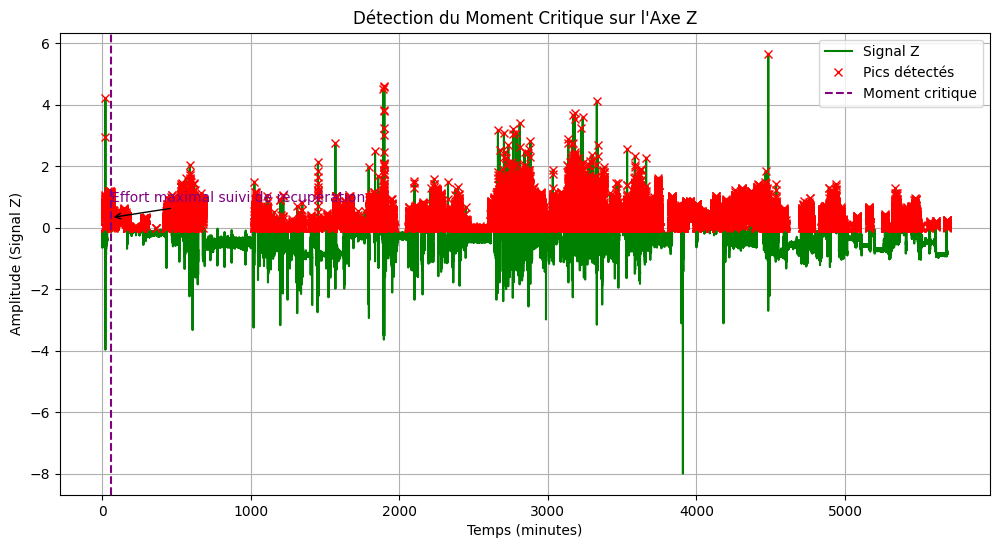

In [13]:
from scipy.signal import find_peaks

# Détecter les pics sur l'axe Z
peaks, _ = find_peaks(data['-0.343750'], height=0)  # Ajustez 'height' si nécessaire
peak_times = data['relative_time_minutes'].iloc[peaks]

# Filtrer uniquement la période 40-60 minutes
peak_times_40_60 = peak_times[(peak_times >= 40) & (peak_times <= 60)]
peak_amplitudes_40_60 = data['-0.343750'].iloc[peaks][(peak_times >= 40) & (peak_times <= 60)]

# Vérifier si des données existent dans la plage 40-60 minutes
if not peak_times_40_60.empty:
    # Localiser le moment critique en utilisant l'amplitude minimale
    min_amplitude_idx = peak_amplitudes_40_60.idxmin()
    critical_time = peak_times[min_amplitude_idx]  # Accéder directement au temps critique
    print(f"Moment critique identifié : {critical_time:.2f} minutes")

    # Visualiser le moment critique
    plt.figure(figsize=(12, 6))
    plt.plot(data['relative_time_minutes'], data['-0.343750'], label="Signal Z", color='green')
    plt.plot(peak_times, data['-0.343750'].iloc[peaks], "x", label="Pics détectés", color='red')
    plt.axvline(x=critical_time, color='purple', linestyle='--', label="Moment critique")
    plt.annotate("Effort maximal suivi de récupération", 
                 xy=(critical_time, data['-0.343750'].iloc[min_amplitude_idx]),
                 xytext=(critical_time + 2, data['-0.343750'].iloc[min_amplitude_idx] + 0.5),
                 arrowprops=dict(facecolor='purple', arrowstyle='->'),
                 fontsize=10, color='purple')
    plt.title("Détection du Moment Critique sur l'Axe Z")
    plt.xlabel("Temps (minutes)")
    plt.ylabel("Amplitude (Signal Z)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Aucun pic détecté dans la plage 40-60 minutes.")


### Additional Physical Activity Metrics - ENMO (Euclidean norm minus one )

Accelerometer / scaling / ENMO

        relative_time_minutes      ENMO
300000              10.000000  0.115411
300001              10.000033  0.115411
300002              10.000067  0.106290
300003              10.000100  0.106841
300004              10.000133  0.115739


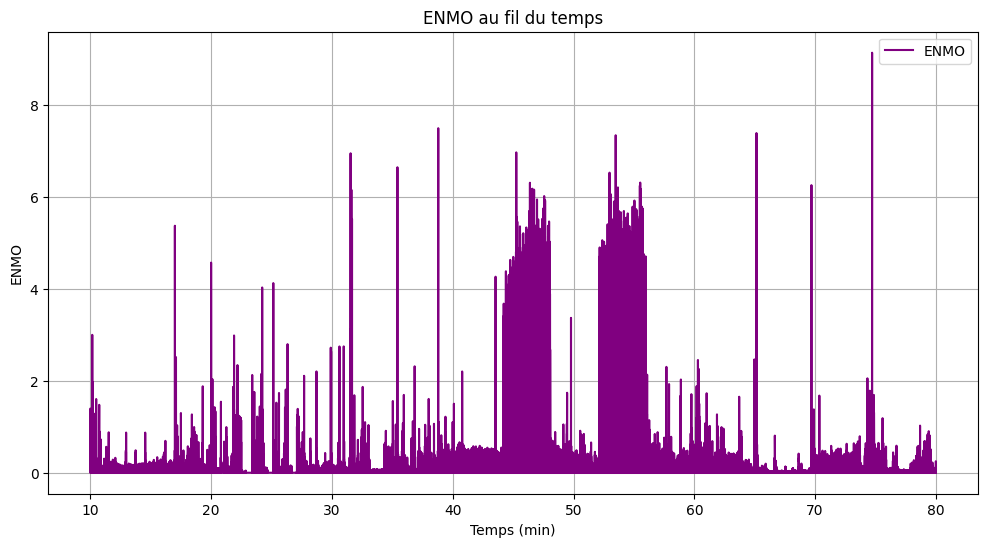

In [44]:
# Calcul de la norme euclidienne des accélérations (X, Y, Z)
filtered_data.loc[:, 'norm'] = np.sqrt(filtered_data['-0.296875']**2 + filtered_data['0.703125']**2 + filtered_data['-0.343750']**2)

# Calcul de l'ENMO : norme - 1, et on garde la valeur minimale entre 0 et la norme
filtered_data.loc[:, 'ENMO'] = np.maximum(filtered_data['norm'] - 1, 0)

# Affichage des premiers résultats
print(filtered_data[['relative_time_minutes', 'ENMO']].head())

# Visualisation de l'ENMO
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['relative_time_minutes'], filtered_data['ENMO'], label="ENMO", color='purple')
plt.title("ENMO au fil du temps")
plt.xlabel("Temps (min)")
plt.ylabel("ENMO")
plt.legend()
plt.grid(True)
plt.show()


Calcul des statistiques descriptives comme la moyenne, la médiane ou les écarts-types pour mieux comprendre la distribution de l'ENMO

In [48]:
# Statistiques de base
stats = filtered_data['ENMO'].describe()
print(stats)


count    2.100001e+06
mean     1.474674e-01
std      5.255263e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.535280e-02
max      9.130846e+00
Name: ENMO, dtype: float64


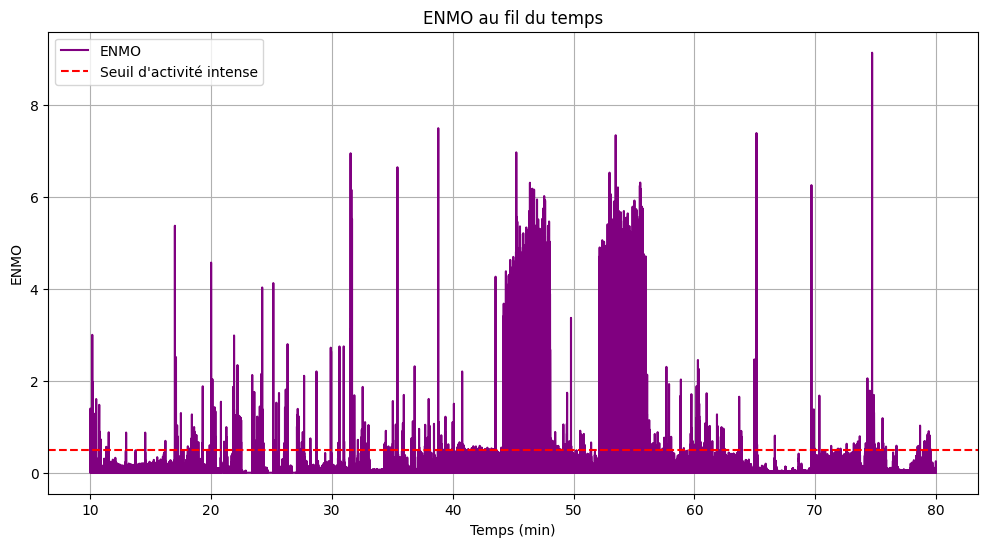

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['relative_time_minutes'], filtered_data['ENMO'], label="ENMO", color='purple')
plt.axhline(y=0.5, color='r', linestyle='--', label="Seuil d'activité intense")
plt.title("ENMO au fil du temps")
plt.xlabel("Temps (min)")
plt.ylabel("ENMO")
plt.legend()
plt.grid(True)
plt.show()


Les périodes de haute activité

         2024-10-06 15:40:04.502  -0.296875  0.703125  -0.343750  \
300135   2024-10-06 15:52:42.475   1.750000 -1.328125   0.390625   
300136   2024-10-06 15:52:42.477   1.187500 -1.656250   0.484375   
300167   2024-10-06 15:52:42.555  -1.671875 -1.250000  -0.296875   
300168   2024-10-06 15:52:42.558  -1.875000 -1.375000  -0.062500   
300169   2024-10-06 15:52:42.561  -1.921875 -1.375000   0.140625   
...                          ...        ...       ...        ...   
2267591  2024-10-06 17:15:37.917  -1.968750 -0.062500  -0.843750   
2267592  2024-10-06 17:15:37.920  -1.953125 -0.078125  -0.828125   
2267593  2024-10-06 17:15:37.923  -1.937500 -0.062500  -0.796875   
2267594  2024-10-06 17:15:37.925  -1.906250 -0.078125  -0.765625   
2360712  2024-10-06 17:19:33.955  -1.750000  0.734375  -0.703125   

         relative_time_minutes      norm      ENMO  
300135               10.004500  2.231368  1.231368  
300136               10.004533  2.094741  1.094741  
300167               10.

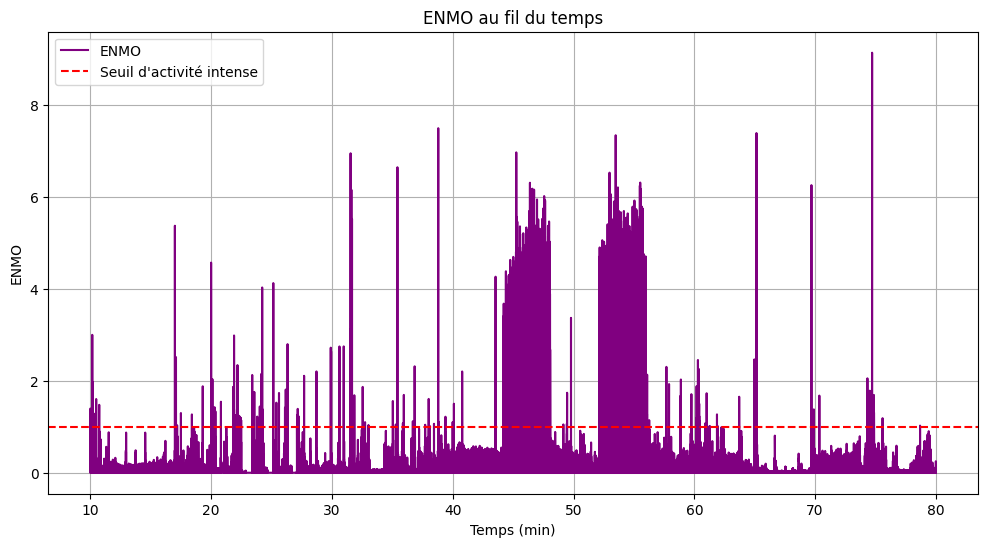

In [52]:
# On définit un seuil pour l'activité intense (par exemple, 1.0)
seuil_haut = 1.0
moments_intenses = filtered_data[filtered_data['ENMO'] > seuil_haut]

# Affichage des moments d'activité intense
print(moments_intenses)

# On trace l'ENMO et les périodes d'activité intense
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['relative_time_minutes'], filtered_data['ENMO'], label="ENMO", color='purple')
plt.axhline(y=seuil_haut, color='r', linestyle='--', label="Seuil d'activité intense")
plt.title("ENMO au fil du temps")
plt.xlabel("Temps (min)")
plt.ylabel("ENMO")
plt.legend()
plt.grid(True)
plt.show()


2

In [74]:
# Reading and examining the CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\FemmeCardio.csv")


# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\
First few rows of the dataset:")
print(df.head())
print("\
Column names:")
print(df.columns.tolist())

Dataset Shape: (2844599, 4)
First few rows of the dataset:
   2024-10-06 15:40:04.502  -0.296875  0.703125  -0.343750
0  2024-10-06 15:40:04.505  -0.281250  0.671875  -0.296875
1  2024-10-06 15:40:04.507  -0.312500  0.718750  -0.359375
2  2024-10-06 15:40:04.510  -0.328125  0.718750  -0.359375
3  2024-10-06 15:40:04.512  -0.312500  0.734375  -0.359375
4  2024-10-06 15:40:04.515  -0.343750  0.734375  -0.375000
Column names:
['2024-10-06 15:40:04.502', '-0.296875', '0.703125', '-0.343750']


In [75]:
# fixing the headers because the column names appear to be incorrectly formatted
# Reformatting the dataset to set the first row as the header
df.columns = ['Timestamp', 'X', 'Y', 'Z']

# Converting the Timestamp column to datetime format for proper analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Displaying the first few rows to confirm the changes
print(df.head())

                Timestamp         X         Y         Z
0 2024-10-06 15:40:04.505 -0.281250  0.671875 -0.296875
1 2024-10-06 15:40:04.507 -0.312500  0.718750 -0.359375
2 2024-10-06 15:40:04.510 -0.328125  0.718750 -0.359375
3 2024-10-06 15:40:04.512 -0.312500  0.734375 -0.359375
4 2024-10-06 15:40:04.515 -0.343750  0.734375 -0.375000


C:\Users\user\AppData\Local\Temp\ipykernel_13148\2036350091.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_epochs = df.set_index('Timestamp').resample(epoch_duration).mean()


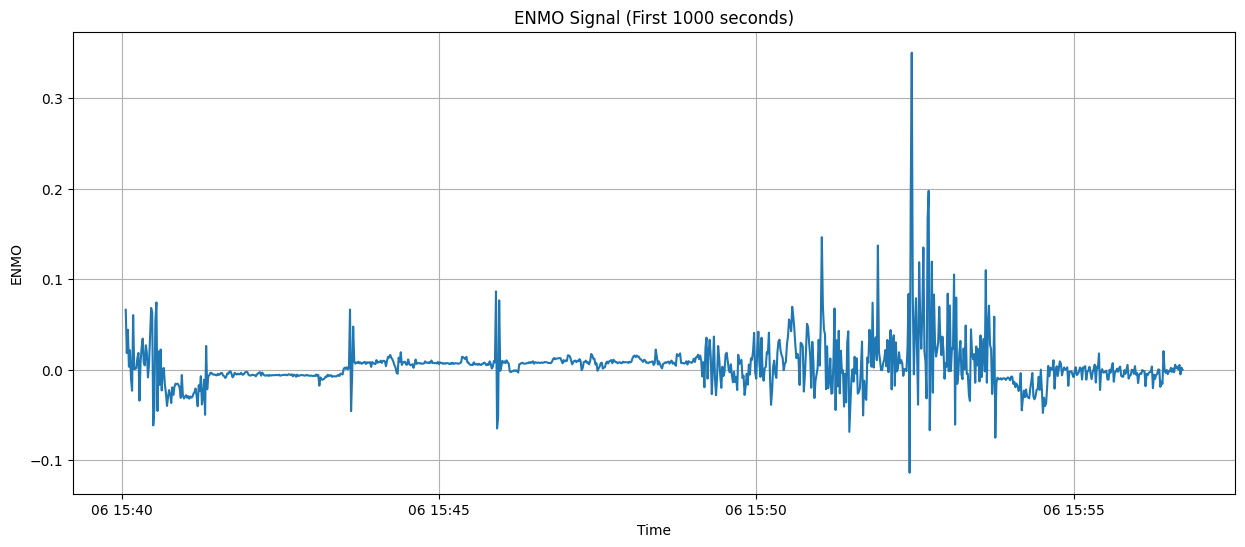

Mean Amplitudes:
X axis: 0.6886287289526573
Y axis: 0.4565255726729848
Z axis: 0.41633483533179894
ENMO Statistics:
count    2.844599e+06
mean     7.717642e-02
std      4.704857e-01
min     -9.481777e-01
25%     -4.367852e-02
50%     -6.613667e-03
75%      3.302404e-02
max      9.130846e+00
Name: ENMO, dtype: float64


In [76]:
# Calculate ENMO (Euclidean Norm Minus One)
def calculate_enmo(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2) - 1

# Add ENMO column to the dataframe
df['ENMO'] = calculate_enmo(df['X'], df['Y'], df['Z'])

# Calculate epoch-based integration (using 1-second epochs)
epoch_duration = '1S'  # 1 second epochs
df_epochs = df.set_index('Timestamp').resample(epoch_duration).mean()

# Calculate mean amplitudes for X, Y, Z
mean_amplitudes = df[['X', 'Y', 'Z']].abs().mean()

# Visualize the ENMO signal
plt.figure(figsize=(15, 6))
plt.plot(df_epochs.index[:1000], df_epochs['ENMO'][:1000])
plt.title('ENMO Signal (First 1000 seconds)')
plt.xlabel('Time')
plt.ylabel('ENMO')
plt.grid(True)
plt.show()

# Print summary statistics
print("\
Mean Amplitudes:")
print("X axis:", mean_amplitudes['X'])
print("Y axis:", mean_amplitudes['Y'])
print("Z axis:", mean_amplitudes['Z'])

# Calculate and print ENMO statistics
print("\
ENMO Statistics:")
print(df['ENMO'].describe())

Le graphique montre les variations du signal ENMO sur les 1000 premières secondes, ce qui nous permet d'observer les changements d'intensité pendant l'activité.

Amplitudes moyennes sur les trois axes :
Axe X : 0.6886287289526573

Axe Y : 0.4565255726729848

Axe Z : 0.41633483533179894

 Intensités d'effort - Distribution of Intensity Levels

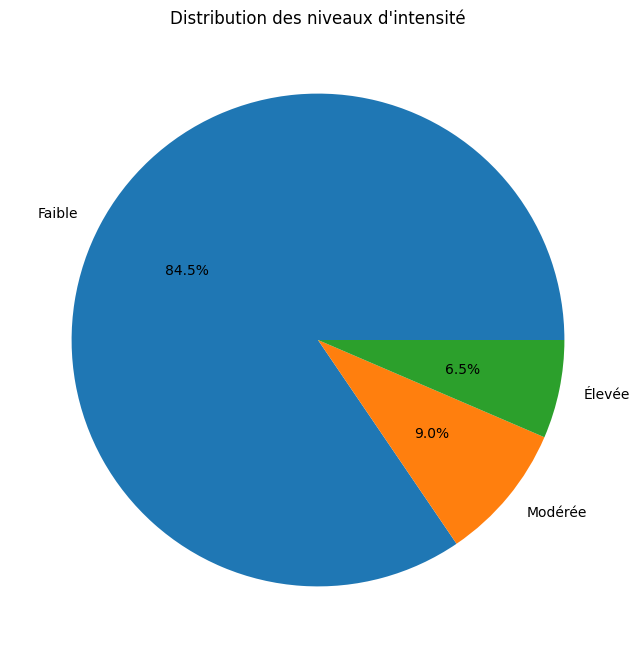

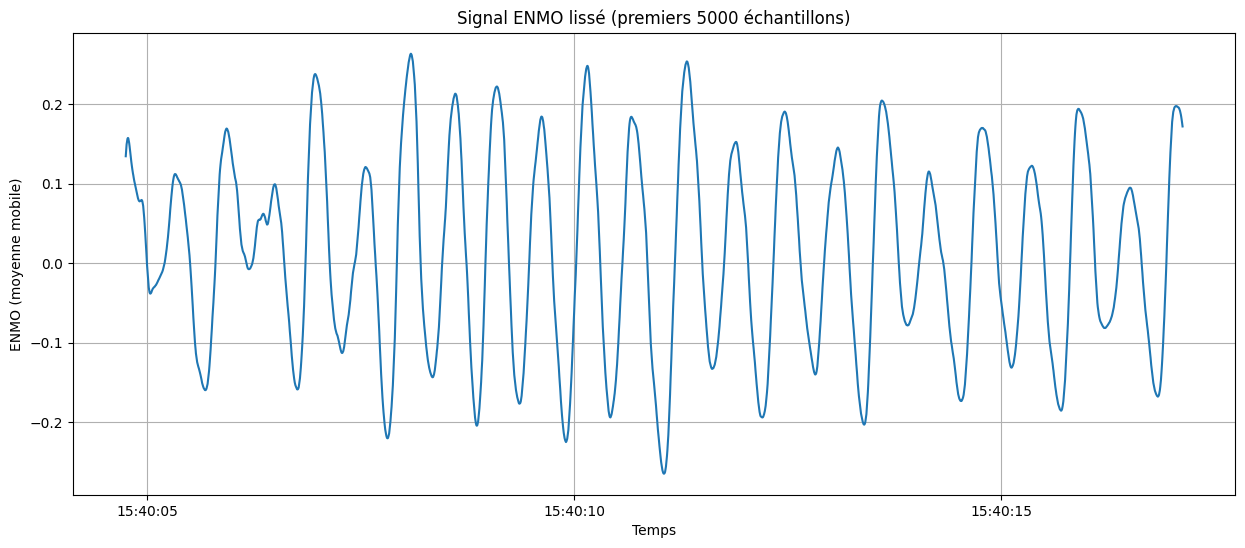

Distribution des durées par niveau d'intensité:
Intensité
Faible     2403812
Modérée     257105
Élevée      183682
Name: count, dtype: int64


In [77]:
# Define intensity levels based on ENMO values
def categorize_intensity(enmo):
    if enmo < 0.1:
        return 'Faible'
    elif enmo < 0.3:
        return 'Modérée'
    else:
        return 'Élevée'

# Add intensity categories
df['Intensité'] = df['ENMO'].apply(categorize_intensity)

# Calculate time spent in each intensity level
intensity_duration = df['Intensité'].value_counts()

# Create a pie chart of intensity distribution
plt.figure(figsize=(10, 8))
plt.pie(intensity_duration, labels=intensity_duration.index, autopct='%1.1f%%')
plt.title('Distribution des niveaux d\'intensité')
plt.show()

# Calculate moving average of ENMO to analyze effort patterns
window_size = 100  # 100 samples moving window
df['ENMO_MA'] = df['ENMO'].rolling(window=window_size).mean()

# Plot the smoothed ENMO signal
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'][:5000], df['ENMO_MA'][:5000])
plt.title('Signal ENMO lissé (premiers 5000 échantillons)')
plt.xlabel('Temps')
plt.ylabel('ENMO (moyenne mobile)')
plt.grid(True)
plt.show()

# Print intensity distribution
print("\
Distribution des durées par niveau d'intensité:")
print(intensity_duration)

Intégration ENMO par epoch

In [80]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate

# Lecture du fichier CSV
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\FemmeCardio.csv")

print("Aperçu des données :")
print(df.head())
print("\
Informations sur le dataset :")
print(df.info())

Aperçu des données :
   2024-10-06 15:40:04.502  -0.296875  0.703125  -0.343750
0  2024-10-06 15:40:04.505  -0.281250  0.671875  -0.296875
1  2024-10-06 15:40:04.507  -0.312500  0.718750  -0.359375
2  2024-10-06 15:40:04.510  -0.328125  0.718750  -0.359375
3  2024-10-06 15:40:04.512  -0.312500  0.734375  -0.359375
4  2024-10-06 15:40:04.515  -0.343750  0.734375  -0.375000
Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844599 entries, 0 to 2844598
Data columns (total 4 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   2024-10-06 15:40:04.502  object 
 1   -0.296875                float64
 2   0.703125                 float64
 3   -0.343750                float64
dtypes: float64(3), object(1)
memory usage: 86.8+ MB
None


In [81]:
# Correction des en-têtes de colonnes
df.columns = ['Timestamp', 'X', 'Y', 'Z']
print("Colonnes après correction :")
print(df.head())

Colonnes après correction :
                 Timestamp         X         Y         Z
0  2024-10-06 15:40:04.505 -0.281250  0.671875 -0.296875
1  2024-10-06 15:40:04.507 -0.312500  0.718750 -0.359375
2  2024-10-06 15:40:04.510 -0.328125  0.718750 -0.359375
3  2024-10-06 15:40:04.512 -0.312500  0.734375 -0.359375
4  2024-10-06 15:40:04.515 -0.343750  0.734375 -0.375000


C:\Users\user\AppData\Local\Temp\ipykernel_13148\3658677851.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  epoch_integration = df.groupby('epoch_group')['ENMO'].apply(lambda x: np.trapz(x))


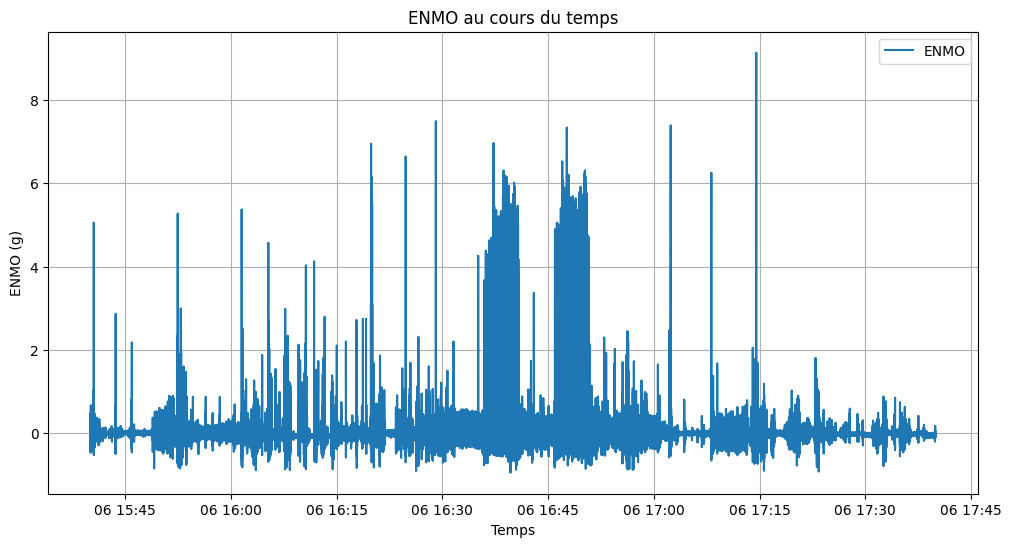

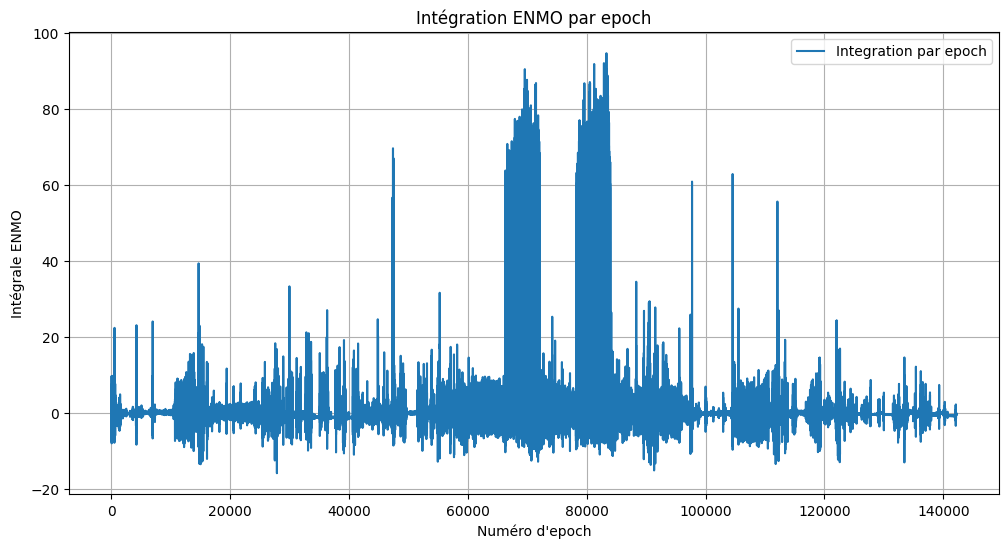

Statistiques descriptives de l'ENMO :
count    2.844599e+06
mean     7.717642e-02
std      4.704857e-01
min     -9.481777e-01
25%     -4.367852e-02
50%     -6.613667e-03
75%      3.302404e-02
max      9.130846e+00
Name: ENMO, dtype: float64
Caractéristiques du signal :
ENMO_mean: 0.0772
ENMO_std: 0.4705
ENMO_max: 9.1308
ENMO_min: -0.9482
Integration_mean: 1.4665
Integration_std: 8.4801


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Conversion du timestamp en datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Calcul de l'ENMO (Euclidean Norm Minus One)
df['ENMO'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2) - 1

# Définition d'une période d'epoch (par exemple, 1 seconde = 20 échantillons)
epoch_size = 20

# Calcul de l'intégration sur les epochs
df['epoch_group'] = np.arange(len(df)) // epoch_size
epoch_integration = df.groupby('epoch_group')['ENMO'].apply(lambda x: np.trapz(x))

# Visualisation de l'ENMO
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['ENMO'], label='ENMO')
plt.title('ENMO au cours du temps')
plt.xlabel('Temps')
plt.ylabel('ENMO (g)')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation de l'intégration par epoch
plt.figure(figsize=(12, 6))
plt.plot(epoch_integration.index, epoch_integration.values, label='Integration par epoch')
plt.title('Intégration ENMO par epoch')
plt.xlabel('Numéro d\'epoch')
plt.ylabel('Intégrale ENMO')
plt.legend()
plt.grid(True)
plt.show()

# Statistiques descriptives
print("Statistiques descriptives de l'ENMO :")
print(df['ENMO'].describe())

# Calcul des caractéristiques du signal
signal_features = {
    'ENMO_mean': df['ENMO'].mean(),
    'ENMO_std': df['ENMO'].std(),
    'ENMO_max': df['ENMO'].max(),
    'ENMO_min': df['ENMO'].min(),
    'Integration_mean': epoch_integration.mean(),
    'Integration_std': epoch_integration.std()
}

print("Caractéristiques du signal :")
for key, value in signal_features.items():
    print(f"{key}: {value:.4f}")


Count of duration in each intensity level - calcul et visualisation

Pour calculer le nombre de durées passées dans chaque niveau d'intensité, on va classifier les valeurs ENMO en niveaux d'intensité prédéfinis (par exemple, sédentaire, léger, modéré, intense) en fonction de seuils, puis compter la durée totale passée dans chaque catégorie, cela nous permet d'obtenir des informations sur la distribution de l'activité à travers les niveaux d'intensité. 



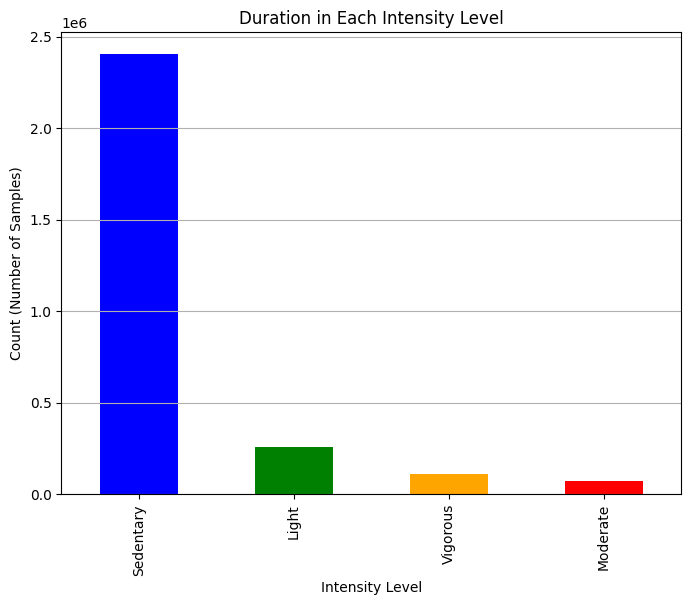

Counts of duration in each intensity level:
Intensity_Level
Sedentary    2403812
Light         257105
Vigorous      109464
Moderate       74218
Name: count, dtype: int64


In [92]:
# Defining intensity level thresholds (example thresholds in g)
def classify_intensity(enmo):
    if enmo < 0.1:
        return 'Sedentary'
    elif 0.1 <= enmo < 0.3:
        return 'Light'
    elif 0.3 <= enmo < 0.6:
        return 'Moderate'
    else:
        return 'Vigorous'

# Classifying ENMO values into intensity levels
df['Intensity_Level'] = df['ENMO'].apply(classify_intensity)

# Counting the duration (number of samples) in each intensity level
intensity_counts = df['Intensity_Level'].value_counts()

# Visualizing the distribution of intensity levels
plt.figure(figsize=(8, 6))
intensity_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Duration in Each Intensity Level')
plt.xlabel('Intensity Level')
plt.ylabel('Count (Number of Samples)')
plt.grid(axis='y')
plt.show()

# Displaying the counts for each intensity level
print("\
Counts of duration in each intensity level:")
print(intensity_counts)